In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<mark><font color='hotpink' size=8 face=雅黑>Date Preparing process<font><mark>

### Step0:  Read CSV

In [2]:
df0 = pd.read_csv ('worldvalues-data.csv', na_values = '?', usecols = ['V2','V240','V242','V45','V47','V48','V50','V51','V52','V53','V54','V57','V58','V59','V139','V182','V205','V207','V229','V262','V235','I_WOMJOB','I_HOMOLIB'])
df0.head()

D:\200826\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (46,48,49,51,52,53,54,55,303,308,310) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,V2,V45,V47,V48,V50,V51,V52,V53,V54,V57,...,V182,V205,V207,V229,V235,V240,V242,V262,I_WOMJOB,I_HOMOLIB
0,Algeria,1,1,1,1,1,1,1,1,Single,...,2,3,Never justifiable,Students,2,1,21,2014,0.5,0.0
1,Algeria,1,1,1,2,1,2,3,2,Single,...,3,Never justifiable,Never justifiable,Students,2,2,24,2014,0.5,0.0
2,Algeria,1,2,3,1,1,1,1,1,Single,...,3,4,Never justifiable,Self employed,1,2,26,2014,0.5,0.0
3,Algeria,2,1,1,2,2,2,2,2,Single,...,3,Never justifiable,Never justifiable,Full time,1,2,28,2014,0.5,0.0
4,Algeria,1,1,1,2,1,3,2,2,Married,...,3,3,Never justifiable,Self employed,2,2,35,2014,0.5,0.0


### Step1: Chgange inappropriate answer into NaN

In [3]:
df0.replace(['-1','-2','-3','-4','-5'],[np.nan,np.nan,np.nan,np.nan,np.nan],inplace=True)
df0.head()

,V2,V45,V47,V48,V50,V51,V52,V53,V54,V57,...,V182,V205,V207,V229,V235,V240,V242,V262,I_WOMJOB,I_HOMOLIB
0,Algeria,1,1,1,1,1,1,1,1,Single,...,2,3,Never justifiable,Students,2,1,21,2014,0.5,0.0
1,Algeria,1,1,1,2,1,2,3,2,Single,...,3,Never justifiable,Never justifiable,Students,2,2,24,2014,0.5,0.0
2,Algeria,1,2,3,1,1,1,1,1,Single,...,3,4,Never justifiable,Self employed,1,2,26,2014,0.5,0.0
3,Algeria,2,1,1,2,2,2,2,2,Single,...,3,Never justifiable,Never justifiable,Full time,1,2,28,2014,0.5,0.0
4,Algeria,1,1,1,2,1,3,2,2,Married,...,3,3,Never justifiable,Self employed,2,2,35,2014,0.5,0.0


In [4]:
df0.replace(['Dont know',
             'HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}',
             'No answer',
             'Not applicable', 
             'AM,DE,SE:Inapplicable ; RU:Inappropriate response; SG: Refused; HT: Dropped out survey{Inappropriate}',
             'SE:Inapplicable ; RU:Inappropriate response; BH: HT: Dropped out survey{Inappropriate}',
             'DE,SE:Inapplicable ; RU:Inappropriate response; HT: Dropped out survey{Inappropriate}',
             'Not asked in survey',
             'DE,SE:Inapplicable; HT: Dropped out survey{Inappropriate}', 
             'Inapplicable (Neither has, nor seeks a job){Inapplicable}',
             "Don't know",
             'HT: Dropped out survey; RU,DE: Inappropriate response{Inappropriate}',
             'BH: Missing;DE: Inapplicable;HT: Dropped out survey;RU: Inappropriate response{Inappropriate}'],
             [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan], inplace=True)
df0.head()

,V2,V45,V47,V48,V50,V51,V52,V53,V54,V57,...,V182,V205,V207,V229,V235,V240,V242,V262,I_WOMJOB,I_HOMOLIB
0,Algeria,1,1,1,1,1,1,1,1,Single,...,2,3,Never justifiable,Students,2,1,21,2014,0.5,0.0
1,Algeria,1,1,1,2,1,2,3,2,Single,...,3,Never justifiable,Never justifiable,Students,2,2,24,2014,0.5,0.0
2,Algeria,1,2,3,1,1,1,1,1,Single,...,3,4,Never justifiable,Self employed,1,2,26,2014,0.5,0.0
3,Algeria,2,1,1,2,2,2,2,2,Single,...,3,Never justifiable,Never justifiable,Full time,1,2,28,2014,0.5,0.0
4,Algeria,1,1,1,2,1,3,2,2,Married,...,3,3,Never justifiable,Self employed,2,2,35,2014,0.5,0.0


### Step2: Examine whether there is any missing value

In [5]:
numMissing = df0.isnull().sum().sum()
print("There are {} missing values in the dataset". format(numMissing))

There are 49402 missing values in the dataset


### Step3: Check the data including missing value (before) v.s. the data including missing value (after)

In [6]:
print(df0.shape)
df0.dropna(how='any',inplace= True)
print(df0.shape)

(89565, 23)
(65889, 23)


<mark><font color='hotpink' size=6 face=雅黑>Research Topic<font><mark>

    I would like to resarch whether some variables can predict where the people come from. Is the person from Asia or from Western area?
    Therefore, I would like to use the countries from Asia or Western area in the following process. 
    I select the top 5 largest economies by 2020 that can represent Asia or Western area,includeing United States, China, Japan, Germany, and India.
    
    Asia: China/Japan/India
    Western area: United States/ Germany

### Step1: Re-read a new csv

In [7]:
df1 = df0[(df0.V2 == 'Japan')|(df0.V2 == 'United States')|(df0.V2 =='China')|(df0.V2 == 'Germany')|(df0.V2 == 'India')]
df1.head()

,V2,V45,V47,V48,V50,V51,V52,V53,V54,V57,...,V182,V205,V207,V229,V235,V240,V242,V262,I_WOMJOB,I_HOMOLIB
12343,China,3,2,1,2,2,4,3,3,Married,...,4,7,Never justifiable,Retired,2,2,58,2013,1.0,0.0
12345,China,1,2,1,2,3,3,3,3,Married,...,3,Never justifiable,Never justifiable,Full time,1,2,48,2013,0.5,0.0
12347,China,1,1,2,2,1,2,2,2,Married,...,1,Never justifiable,Never justifiable,Self employed,1,1,34,2013,0.5,0.0
12348,China,3,3,3,2,4,3,3,3,Widowed,...,2,6,6,Full time,1,2,43,2013,1.0,0.0
12349,China,1,3,1,2,2,4,2,2,Married,...,2,7,Never justifiable,Full time,1,1,26,2013,0.5,0.0


In [8]:
df1.to_csv('Country.csv', index = False, na_rep = '?')

In [9]:
df1 = pd.read_csv ('Country.csv', na_values = '?', usecols = ['V2','V240','V242','V45','V47','V48','V50','V51','V52','V53','V54','V57','V58','V59','V139','V182','V205','V207','V229','V262','V235','I_WOMJOB','I_HOMOLIB'])
df1.head()

,V2,V45,V47,V48,V50,V51,V52,V53,V54,V57,...,V182,V205,V207,V229,V235,V240,V242,V262,I_WOMJOB,I_HOMOLIB
0,China,3,2,1,2,2,4,3,3,Married,...,4,7,Never justifiable,Retired,2,2,58,2013,1.0,0.0
1,China,1,2,1,2,3,3,3,3,Married,...,3,Never justifiable,Never justifiable,Full time,1,2,48,2013,0.5,0.0
2,China,1,1,2,2,1,2,2,2,Married,...,1,Never justifiable,Never justifiable,Self employed,1,1,34,2013,0.5,0.0
3,China,3,3,3,2,4,3,3,3,Widowed,...,2,6,6,Full time,1,2,43,2013,1.0,0.0
4,China,1,3,1,2,2,4,2,2,Married,...,2,7,Never justifiable,Full time,1,1,26,2013,0.5,0.0


### Step2: Change the colume name

In [10]:
df1.columns

Index(['V2', 'V45', 'V47', 'V48', 'V50', 'V51', 'V52', 'V53', 'V54', 'V57',
       'V58', 'V59', 'V139', 'V182', 'V205', 'V207', 'V229', 'V235', 'V240',
       'V242', 'V262', 'I_WOMJOB', 'I_HOMOLIB'],
      dtype='object')

In [11]:
df1.rename(columns = 
            {'V2':'Country', 
             'V45':'Men_should_get_job_when_job_scarce', 
             'V47':'Wife_shouldnot_earn_more_than_husband',
             'V48':'Job_make_women_independent',
             'V50':'Mother_work_children_suffer',
             'V51':'Male_political_leaders_better',
             'V52':'UniEducation_is_more_important_for_boy',
             'V53':'Male_business_executives_better',
             'V54':'Housewife_fulfilling_working',
             'V57':'Marriage_status',
             'V58':'number_of_kids',
             'V59':'Satisfaction_with_financial',
             'V139':'Female_same_rights_as_men',
             'V182':'Worries_kids_education',
             'V205':'Justifiable_Divorce',
             'V207':'Justifiable_Suicide',
             'V229':'Working_status',
             'V235':'Whether_chief_wage_earner',
             'V240':'Sex',
             'V242':'Age',
             'V262':'Survey_year'}, inplace = True)
df1.head()

,Country,Men_should_get_job_when_job_scarce,Wife_shouldnot_earn_more_than_husband,Job_make_women_independent,Mother_work_children_suffer,Male_political_leaders_better,UniEducation_is_more_important_for_boy,Male_business_executives_better,Housewife_fulfilling_working,Marriage_status,...,Worries_kids_education,Justifiable_Divorce,Justifiable_Suicide,Working_status,Whether_chief_wage_earner,Sex,Age,Survey_year,I_WOMJOB,I_HOMOLIB
0,China,3,2,1,2,2,4,3,3,Married,...,4,7,Never justifiable,Retired,2,2,58,2013,1.0,0.0
1,China,1,2,1,2,3,3,3,3,Married,...,3,Never justifiable,Never justifiable,Full time,1,2,48,2013,0.5,0.0
2,China,1,1,2,2,1,2,2,2,Married,...,1,Never justifiable,Never justifiable,Self employed,1,1,34,2013,0.5,0.0
3,China,3,3,3,2,4,3,3,3,Widowed,...,2,6,6,Full time,1,2,43,2013,1.0,0.0
4,China,1,3,1,2,2,4,2,2,Married,...,2,7,Never justifiable,Full time,1,1,26,2013,0.5,0.0


In [12]:
df1.shape #Check Data Size

(7912, 23)

## <mark><font color='hotpink' size=6 face=雅黑>Q1 Whether the variable (whether men should get job when job is scarce) can predict where the people come from.<font><mark> 
    Is the people from Asia or from Western area?
    (People)Men_should_get_job_when_job_scarce ---> country's location(Asia or Western)

In [13]:
df1.Men_should_get_job_when_job_scarce.value_counts()

3    3655
1    2465
2    1792
Name: Men_should_get_job_when_job_scarce, dtype: int64

In [14]:
Problem = df1['Men_should_get_job_when_job_scarce']
bins = [0.0,1.0,2.0,3.0]
bin_names = ['Agree', 'Neither','Disagree']

df1['Male_should_get'] = pd.cut(Problem,bins,labels=bin_names)
print(df1.Male_should_get.value_counts())
df1.tail()

Disagree    3655
Agree       2465
Neither     1792
Name: Male_should_get, dtype: int64


,Country,Men_should_get_job_when_job_scarce,Wife_shouldnot_earn_more_than_husband,Job_make_women_independent,Mother_work_children_suffer,Male_political_leaders_better,UniEducation_is_more_important_for_boy,Male_business_executives_better,Housewife_fulfilling_working,Marriage_status,...,Justifiable_Divorce,Justifiable_Suicide,Working_status,Whether_chief_wage_earner,Sex,Age,Survey_year,I_WOMJOB,I_HOMOLIB,Male_should_get
7907,India,1,1,1,1,1,4,3,1,Married,...,Never justifiable,Never justifiable,Full time,1,1,39,2012,0.5,0.000000e+00,Agree
7908,India,2,3,1,1,3,4,2,1,Married,...,Never justifiable,Never justifiable,Housewife,2,2,47,2012,0.5,0.000000e+00,Neither
7909,India,3,3,1,3,4,4,3,2,Married,...,Never justifiable,Never justifiable,Housewife,2,2,33,2012,1.0,0.000000e+00,Disagree
7910,India,1,3,1,1,3,3,3,1,Married,...,Never justifiable,Never justifiable,Unemployed,2,2,31,2012,0.5,1.779649e-43,Agree
7911,India,3,3,1,2,4,3,4,4,Widowed,...,Never justifiable,Never justifiable,Full time,1,2,35,2012,1.0,0.000000e+00,Disagree


In [15]:
df_proportion0 = pd.crosstab(df1['Country'], df1.Male_should_get, normalize='index')
df_proportion0

Male_should_get,Agree,Neither,Disagree
Country,,,
China,0.390708,0.179741,0.429551
Germany,0.147436,0.210114,0.642450
India,0.546724,0.198527,0.254750
Japan,0.364407,0.457627,0.177966
United States,0.059230,0.236426,0.704344


In [16]:
df_proportion0.Disagree.unique()

array([0.42955065, 0.64245014, 0.2547499 , 0.1779661 , 0.70434353])

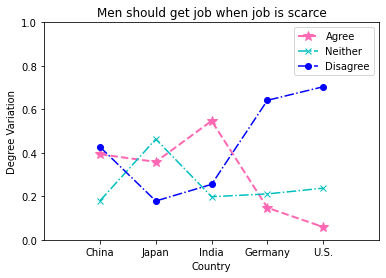

In [17]:
fig, ax = plt.subplots()

ax.plot([1,2,3,4,5],
        [0.39325843,0.358521, 0.54692932, 0.147449 , 0.05873715],
        color='hotpink',marker='*',markersize=10,linestyle ='--', linewidth=2, label='Agree')

ax.plot([1,2,3,4,5],
        [0.17977528,0.463023, 0.198146  , 0.211041, 0.23739599],
        'c-.x',label = 'Neither')

ax.plot([1,2,3,4,5],
        [0.42696629, 0.178457, 0.25492468, 0.641509, 0.70386686],
        'b-.o',label = 'Disagree')

ax.set_xlabel('Country')
ax.set_ylabel('Degree Variation')
ax.set_title('Men should get job when job is scarce')
ax.set_xlim([0,6])
ax.set_ylim([0,1])
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(['China','Japan','India','Germany','U.S.'])
ax.legend();

In [18]:
df_proportion0.sort_values(by='Agree', inplace = True, ascending = True)
df_proportion0

Male_should_get,Agree,Neither,Disagree
Country,,,
United States,0.059230,0.236426,0.704344
Germany,0.147436,0.210114,0.642450
Japan,0.364407,0.457627,0.177966
China,0.390708,0.179741,0.429551
India,0.546724,0.198527,0.254750


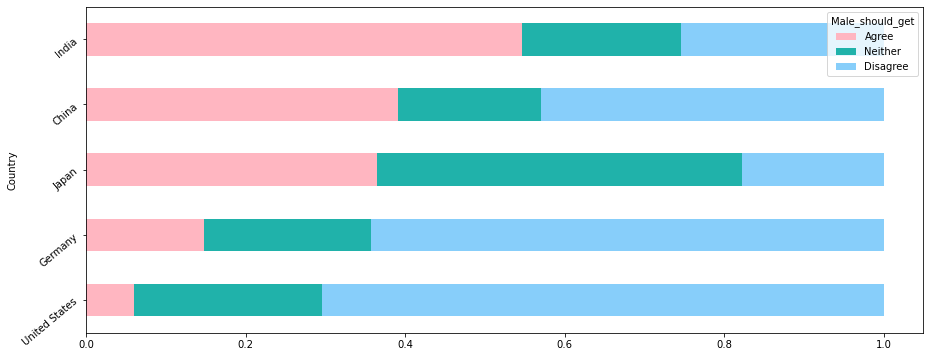

In [19]:
df_proportion0.plot.barh(stacked=True, figsize=(15,6), rot=40,  color = ['lightpink','lightseagreen','lightskyblue']);

## <mark><font color='hotpink' size=6 face=雅黑>Q2 Variable: If wife earns more than husband, whether it will cause problems. Examine whether this variable can predict where the people come from.<font><mark>
    (People)If wife earns more than husband, whether it will cause problems. ---> Country's location (Asia or Western area)

In [20]:
df1.Wife_shouldnot_earn_more_than_husband.value_counts()

3    3704
2    2378
1    1830
Name: Wife_shouldnot_earn_more_than_husband, dtype: int64

In [21]:
Problem2 = df1['Wife_shouldnot_earn_more_than_husband']
bins = [0.0,1.0,2.0,3.0]
bin_names = ['Agree', 'Neither','Disagree']

df1['Women_earn_more_is_issue'] = pd.cut(Problem2,bins,labels=bin_names)
print(df1.Women_earn_more_is_issue.value_counts())
df1.tail()

Disagree    3704
Neither     2378
Agree       1830
Name: Women_earn_more_is_issue, dtype: int64


,Country,Men_should_get_job_when_job_scarce,Wife_shouldnot_earn_more_than_husband,Job_make_women_independent,Mother_work_children_suffer,Male_political_leaders_better,UniEducation_is_more_important_for_boy,Male_business_executives_better,Housewife_fulfilling_working,Marriage_status,...,Justifiable_Suicide,Working_status,Whether_chief_wage_earner,Sex,Age,Survey_year,I_WOMJOB,I_HOMOLIB,Male_should_get,Women_earn_more_is_issue
7907,India,1,1,1,1,1,4,3,1,Married,...,Never justifiable,Full time,1,1,39,2012,0.5,0.000000e+00,Agree,Agree
7908,India,2,3,1,1,3,4,2,1,Married,...,Never justifiable,Housewife,2,2,47,2012,0.5,0.000000e+00,Neither,Disagree
7909,India,3,3,1,3,4,4,3,2,Married,...,Never justifiable,Housewife,2,2,33,2012,1.0,0.000000e+00,Disagree,Disagree
7910,India,1,3,1,1,3,3,3,1,Married,...,Never justifiable,Unemployed,2,2,31,2012,0.5,1.779649e-43,Agree,Disagree
7911,India,3,3,1,2,4,3,4,4,Widowed,...,Never justifiable,Full time,1,2,35,2012,1.0,0.000000e+00,Disagree,Disagree


In [22]:
df_proportion0 = pd.crosstab(df1['Country'], df1.Women_earn_more_is_issue, normalize='index')
df_proportion0

Women_earn_more_is_issue,Agree,Neither,Disagree
Country,,,
China,0.217822,0.255141,0.527037
Germany,0.165242,0.245014,0.589744
India,0.384645,0.289259,0.326095
Japan,0.161017,0.581356,0.257627
United States,0.111056,0.301086,0.587858


In [23]:
df_proportion0.Disagree.unique()

array([0.52703732, 0.58974359, 0.32609539, 0.25762712, 0.58785785])

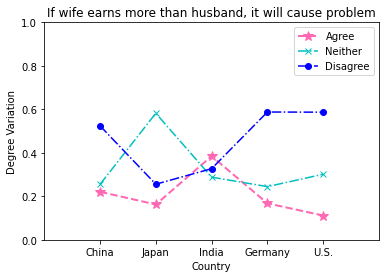

In [24]:
fig, ax = plt.subplots()

ax.plot([1,2,3,4,5],
        [0.22097378, 0.162379, 0.38470452, 0.167715, 0.11160059],
        color='hotpink',marker='*',markersize=10,linestyle ='--', linewidth=2, label='Agree')

ax.plot([1,2,3,4,5],
        [0.25468165, 0.581994, 0.28814214,0.244584, 0.30151738],
        'c-.x',label = 'Neither')

ax.plot([1,2,3,4,5],
       [0.52434457, 0.255627, 0.32715334, 0.587701, 0.58688204],
        'b-.o',label = 'Disagree')

ax.set_xlabel('Country')
ax.set_ylabel('Degree Variation')
ax.set_title('If wife earns more than husband, it will cause problem')
ax.set_xlim([0,6])
ax.set_ylim([0,1])
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(['China','Japan','India','Germany','U.S.'])
ax.legend();

## <mark><font color='hotpink' size=6 face=雅黑>Q3 Whether the variable of whether the chief wage earners are almost male can predict where the people come from?<font><mark>
    (People)whether the chief wage earners are almost male ---> Country's location(Asia or Western area)

In [25]:
df1.Sex.value_counts()

 1    4026
 2    3885
-5       1
Name: Sex, dtype: int64

In [26]:
gender = df1['Sex']
bin = [0,1,2]
bin_names=['Male','Female']

df1['Gender'] = pd.cut(gender,bin, labels=bin_names)
df1.tail()

,Country,Men_should_get_job_when_job_scarce,Wife_shouldnot_earn_more_than_husband,Job_make_women_independent,Mother_work_children_suffer,Male_political_leaders_better,UniEducation_is_more_important_for_boy,Male_business_executives_better,Housewife_fulfilling_working,Marriage_status,...,Working_status,Whether_chief_wage_earner,Sex,Age,Survey_year,I_WOMJOB,I_HOMOLIB,Male_should_get,Women_earn_more_is_issue,Gender
7907,India,1,1,1,1,1,4,3,1,Married,...,Full time,1,1,39,2012,0.5,0.000000e+00,Agree,Agree,Male
7908,India,2,3,1,1,3,4,2,1,Married,...,Housewife,2,2,47,2012,0.5,0.000000e+00,Neither,Disagree,Female
7909,India,3,3,1,3,4,4,3,2,Married,...,Housewife,2,2,33,2012,1.0,0.000000e+00,Disagree,Disagree,Female
7910,India,1,3,1,1,3,3,3,1,Married,...,Unemployed,2,2,31,2012,0.5,1.779649e-43,Agree,Disagree,Female
7911,India,3,3,1,2,4,3,4,4,Widowed,...,Full time,1,2,35,2012,1.0,0.000000e+00,Disagree,Disagree,Female


In [27]:
df1['Whether_chief_wage_earner'].value_counts()

2    4016
1    3896
Name: Whether_chief_wage_earner, dtype: int64

In [28]:
df1['Whether_chief_wage_earner'].replace([1,2],['Yes','No'], inplace = True)   
df1.head()

,Country,Men_should_get_job_when_job_scarce,Wife_shouldnot_earn_more_than_husband,Job_make_women_independent,Mother_work_children_suffer,Male_political_leaders_better,UniEducation_is_more_important_for_boy,Male_business_executives_better,Housewife_fulfilling_working,Marriage_status,...,Working_status,Whether_chief_wage_earner,Sex,Age,Survey_year,I_WOMJOB,I_HOMOLIB,Male_should_get,Women_earn_more_is_issue,Gender
0,China,3,2,1,2,2,4,3,3,Married,...,Retired,No,2,58,2013,1.0,0.0,Disagree,Neither,Female
1,China,1,2,1,2,3,3,3,3,Married,...,Full time,Yes,2,48,2013,0.5,0.0,Agree,Neither,Female
2,China,1,1,2,2,1,2,2,2,Married,...,Self employed,Yes,1,34,2013,0.5,0.0,Agree,Agree,Male
3,China,3,3,3,2,4,3,3,3,Widowed,...,Full time,Yes,2,43,2013,1.0,0.0,Disagree,Disagree,Female
4,China,1,3,1,2,2,4,2,2,Married,...,Full time,Yes,1,26,2013,0.5,0.0,Agree,Disagree,Male


In [29]:
pdcross1 = pd.crosstab([df1.Gender,df1.Country], df1['Whether_chief_wage_earner'])
pdcross1

Whether_chief_wage_earner   No  Yes
Gender Country                     
Male   China               221  432
       Germany             130  524
       India               549  893
       Japan                52  244
       United States       313  668
Female China               505  155
       Germany             376  374
       India               966  170
       Japan               236   58
       United States       667  378

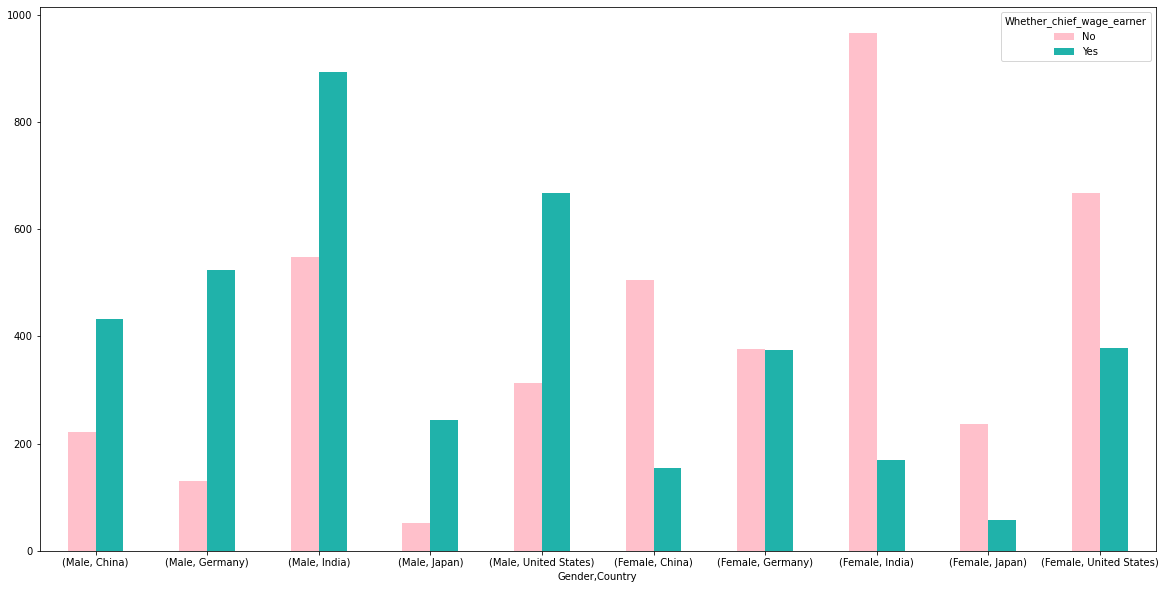

In [30]:
pdcross1.plot.bar(figsize=(20,10),rot=0, color=['pink','lightseagreen']);

## <mark><font color='hotpink' size=6 face=雅黑>Q4 Dose both the marriage status and the status predict where the people come from? <font><mark> 
    (People)marriage & working ---> Country's location (Asia or Western area)

### Step1: categorizing the options into having working or not

In [31]:
df1.Working_status.value_counts()

Full time        2838
Housewife        1251
Retired          1085
Part time         799
Self employed     690
8                 546
Unemployed        468
Students          235
Name: Working_status, dtype: int64

In [32]:
df1['Working_status'].replace(['Full time', 'Retired', 'Self employed', 'Housewife', 'Part time',
       'Unemployed', 'Students', '8'],['Yes','No','Yes','No','Yes','No','No','No'], inplace = True)

In [33]:
df1.Working_status.value_counts()

Yes    4327
No     3585
Name: Working_status, dtype: int64

### Step2: categorizing the options into married or not

In [34]:
df1.Marriage_status.unique()

array(['Married', 'Widowed', 'Divorced', 'Single', 'Separated',
       'Living together as married'], dtype=object)

In [35]:
df1['Marriage_status'].replace(['Married', 'Widowed', 'Divorced', 'Single', 'Separated',
       'Living together as married'],['Yes','NO','NO','NO','Yes','NO'], inplace = True)

In [36]:
df1.Marriage_status.value_counts()

Yes    5996
NO     1916
Name: Marriage_status, dtype: int64

### Step3: Crosstab

In [37]:
prcross2 = pd.crosstab([df1.Gender,df1.Marriage_status], df1.Working_status)
prcross2 

Working_status            No   Yes
Gender Marriage_status            
Male   NO                362   504
       Yes              1117  2043
Female NO                514   536
       Yes              1591  1244

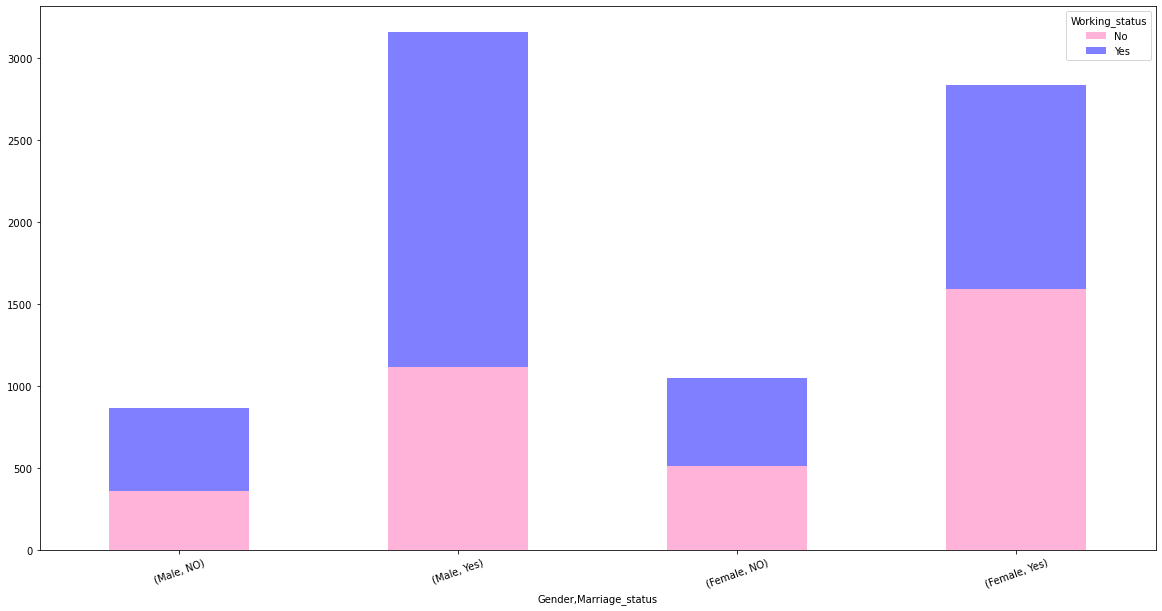

In [38]:
prcross2.plot.bar(figsize=(20,10),stacked = True,rot=20, color=['hotpink','blue'], alpha = 0.5);

### Step4: Taking the country into consideration

In [39]:
prcross3 = pd.crosstab([df1.Country,df1.Gender], [df1.Marriage_status,df1.Working_status])
prcross3 

Marriage_status        NO       Yes     
Working_status         No  Yes   No  Yes
Country       Gender                    
China         Male     38   67   93  455
              Female   56   62  165  377
Germany       Male    110  144  153  247
              Female  176  176  163  235
India         Male     37   44  588  773
              Female   70   23  852  191
Japan         Male     15   47   66  168
              Female   24   52  110  108
United States Male    162  202  217  400
              Female  188  223  301  333

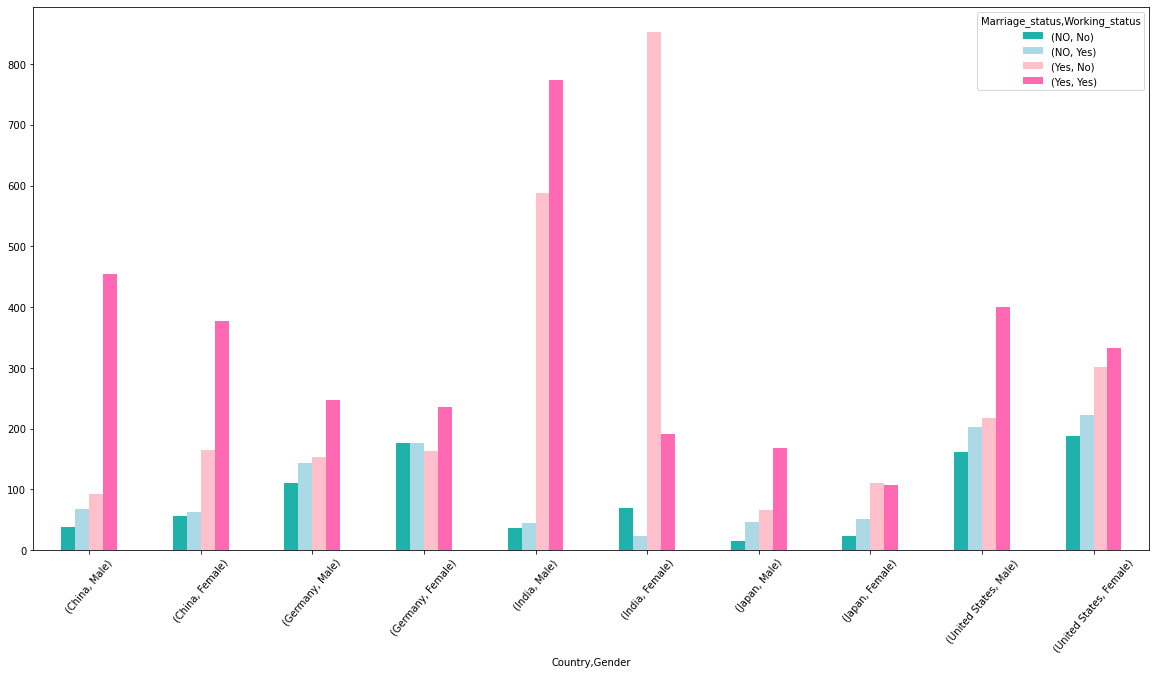

In [40]:
prcross3.plot.bar(figsize=(20,10),rot=50, color=['lightseagreen','lightblue','pink','hotpink']);

## <mark><font color='hotpink' size=6 face=雅黑>Q5 If female have kids, whether they will choose to give up their job, and whether this situaiton can predict where the people come from?<font><mark> 
    (People)Have kids & give up job ---> Country's location(Asia or Western area) 

### Step1: categorizing the options into having kids or not

In [41]:
df1['number_of_kids'].replace(['1 child', '2 children', 'No children', '3 children', '4 children','6 children', '5 children', '7', '8'],['Yes','Yes','NO','Yes','Yes','Yes','Yes','Yes','Yes'], inplace = True)

In [42]:
df1.number_of_kids.unique()

array(['Yes', 'NO'], dtype=object)

### Step2: Selecting the female who have kids

In [43]:
femalewithkid = df1[(df1.Gender=='Female')&(df1.number_of_kids=='Yes')]
femalewithkid.shape

(3244, 26)

In [44]:
prcross4 = pd.crosstab(femalewithkid.Country,femalewithkid.Working_status)
prcross4 

Working_status,No,Yes
Country,,
China,176,389
Germany,280,315
India,872,196
Japan,121,127
United States,389,379


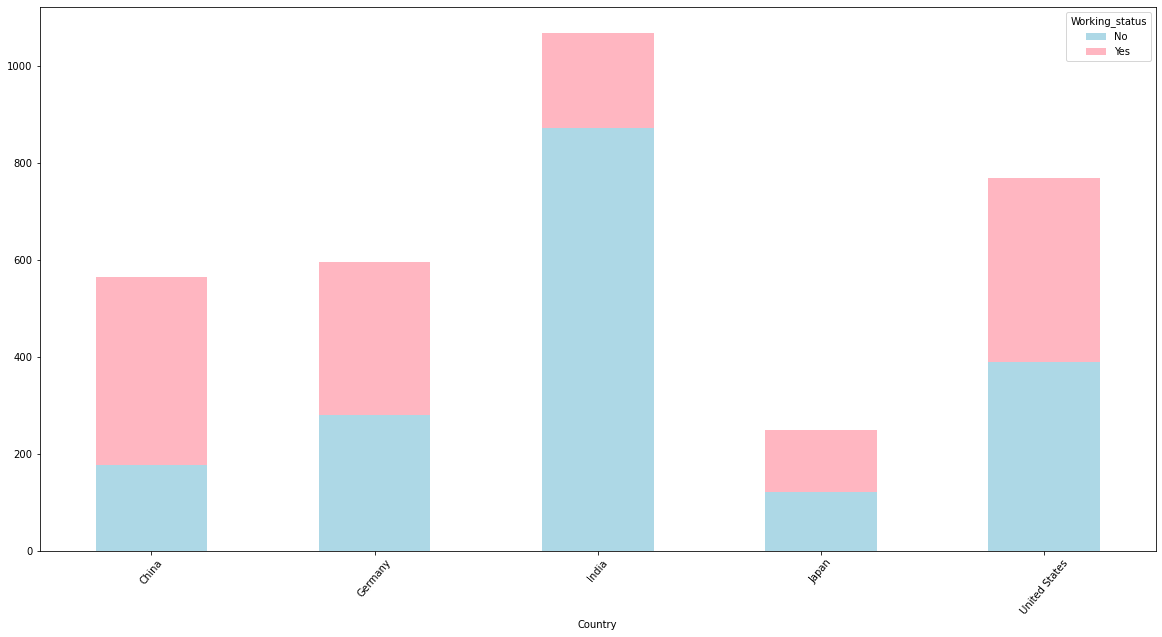

In [45]:
prcross4.plot.bar(figsize=(20,10),stacked = True,rot=50, color=['lightblue','lightpink']);

## <mark><font color='hotpink' size=6 face=雅黑>Extended Question5-1 Whether the women have too many kids will force them to give up their job, and whether this situaiton can predict where the people come from?<font><mark> 
    (People)too many kinds & give up job ---> Country's location(Asia or Western area)

In [46]:
df0.V58.unique()

array(['No children', '3 children', '2 children', '4 children',
       '5 children', '7', '1 child', '6 children', '8'], dtype=object)

In [47]:
prcross5 = pd.crosstab(df0.V58,femalewithkid.Country)
prcross5

Country,China,Germany,India,Japan,United States
V58,,,,,
1 child,15,22,201,25,94
2 children,37,47,289,61,199
3 children,30,40,103,53,126
4 children,33,19,35,16,52
5 children,25,3,15,3,19
6 children,11,2,2,2,3
7,2,1,4,2,2
8,4,0,2,0,0
No children,147,10,238,38,180


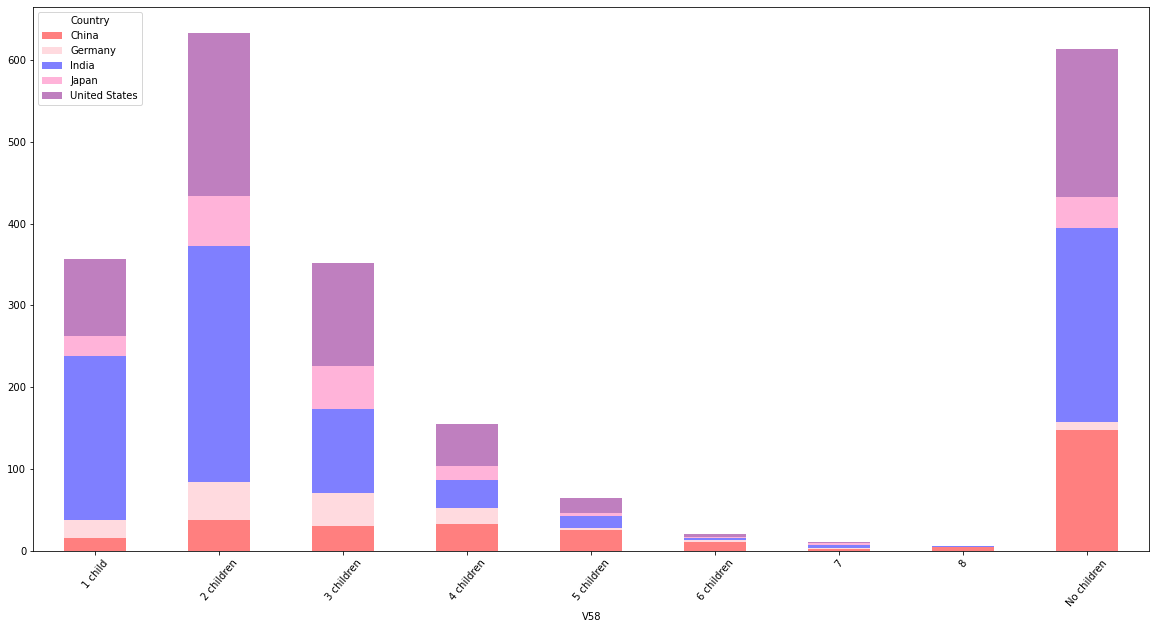

In [48]:
prcross5.plot.bar(figsize=(20,10),stacked = True,rot=50, color=['red','lightpink','blue','hotpink','purple'], alpha = 0.5);

## <mark><font color='hotpink' size=6 face=雅黑>Extended Question Q5-2 Whether the reason makes working mother in Inia less is because of the imbalance number between men and women?<font><mark> 

## Step1: Let's check the proportion of gender in India

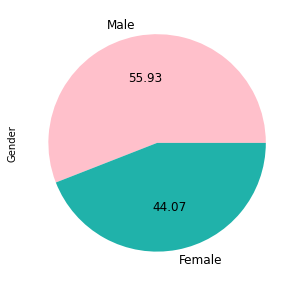

In [49]:
india = df1[df1.Country=='India']
india.Gender.value_counts()
india.Gender.value_counts().plot.pie(labels = ['Male','Female'], colors=['pink','lightseagreen'],
                                autopct= '%.2f', fontsize= 12, figsize=(5,5)); #;

## Step2: Let's check the proportion of gender in U.S.

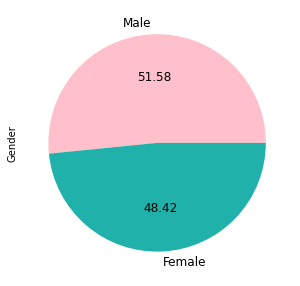

In [50]:
china = df1[df1.Country=='United States']
china.Gender.value_counts()
china.Gender.value_counts().plot.pie(labels = ['Male','Female'], colors=['pink','lightseagreen'],
                                autopct= '%.2f', fontsize= 12, figsize=(5,5)); #;

## Step3: Let's check the proportion of gender in each country

In [51]:
hi = df1.Gender.groupby(df1['Country'])
hi

In [52]:
df1.Gender.value_counts()

Male      4026
Female    3885
Name: Gender, dtype: int64

In [53]:
gender = pd.crosstab(df1.Country,df1.Gender)
gender

Gender,Male,Female
Country,,
China,653,660
Germany,654,750
India,1442,1136
Japan,296,294
United States,981,1045


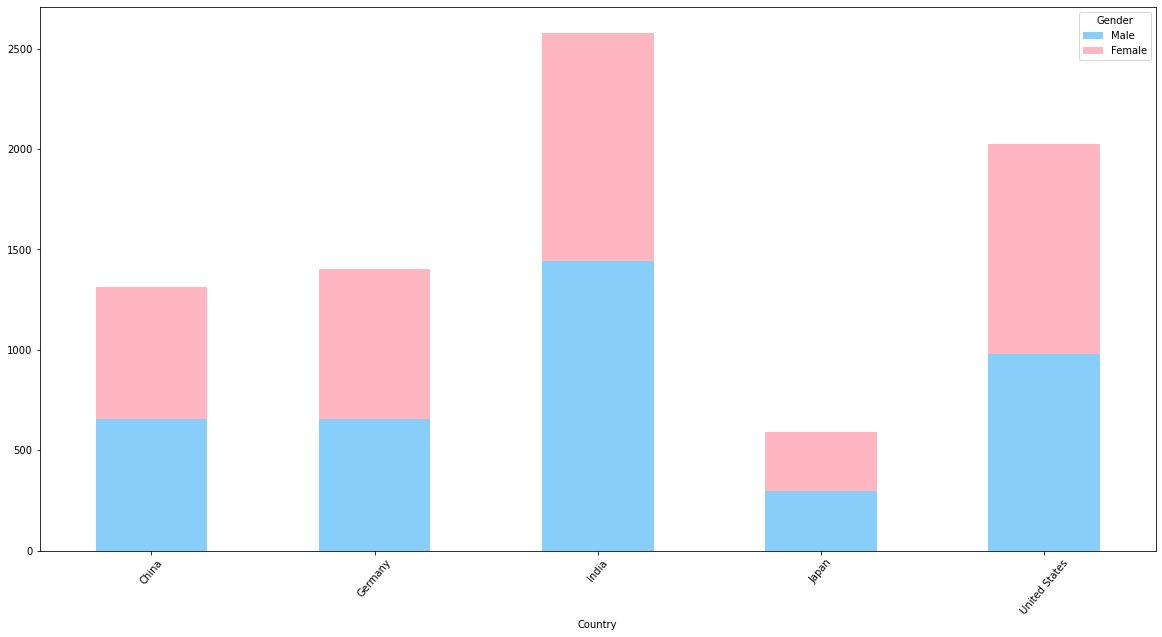

In [54]:
gender.plot.bar(figsize=(20,10),stacked = True,rot=50, color=['lightskyblue','lightpink']);

## <mark><font color='hotpink' size=6 face=雅黑>Q6 Examine whethe the emancipative values for female's job can predict where the people come from.<font><mark> 
    (People)the emancipative values ---> Country's location(Asia or Western area) 

In [55]:
Job = df1['I_WOMJOB']
bins =[0,0.5,1] 
bin_names=['Low','High']

df1['job'] = pd.cut(Job,bins, labels = bin_names)                     
df1.tail()

,Country,Men_should_get_job_when_job_scarce,Wife_shouldnot_earn_more_than_husband,Job_make_women_independent,Mother_work_children_suffer,Male_political_leaders_better,UniEducation_is_more_important_for_boy,Male_business_executives_better,Housewife_fulfilling_working,Marriage_status,...,Whether_chief_wage_earner,Sex,Age,Survey_year,I_WOMJOB,I_HOMOLIB,Male_should_get,Women_earn_more_is_issue,Gender,job
7907,India,1,1,1,1,1,4,3,1,Yes,...,Yes,1,39,2012,0.5,0.000000e+00,Agree,Agree,Male,Low
7908,India,2,3,1,1,3,4,2,1,Yes,...,No,2,47,2012,0.5,0.000000e+00,Neither,Disagree,Female,Low
7909,India,3,3,1,3,4,4,3,2,Yes,...,No,2,33,2012,1.0,0.000000e+00,Disagree,Disagree,Female,High
7910,India,1,3,1,1,3,3,3,1,Yes,...,No,2,31,2012,0.5,1.779649e-43,Agree,Disagree,Female,Low
7911,India,3,3,1,2,4,3,4,4,NO,...,Yes,2,35,2012,1.0,0.000000e+00,Disagree,Disagree,Female,High


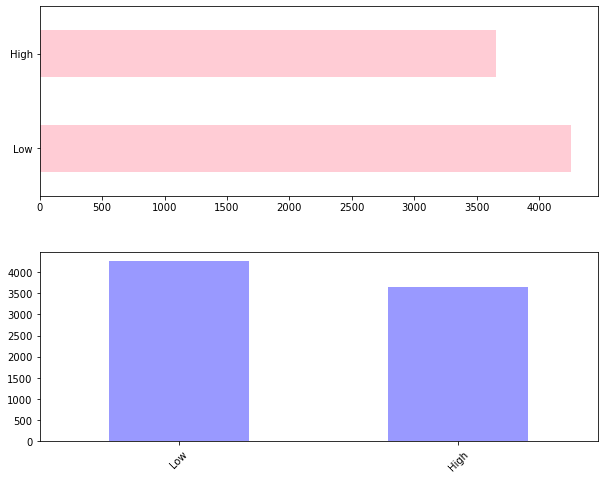

In [56]:
countbyjob = df1.job.value_counts()

fig, axes = plt.subplots(2,1) 
countbyjob.plot.barh(figsize=(10,8),ax = axes[0], color = 'pink', alpha = 0.8, rot = 0)
countbyjob.plot.bar(figsize=(10,8),ax = axes[1], color = 'blue', alpha = 0.4, rot = 45)

plt.subplots_adjust(hspace= 0.3) 

In [57]:
df2 = df1[df1.Gender == 'Female']
df2

,Country,Men_should_get_job_when_job_scarce,Wife_shouldnot_earn_more_than_husband,Job_make_women_independent,Mother_work_children_suffer,Male_political_leaders_better,UniEducation_is_more_important_for_boy,Male_business_executives_better,Housewife_fulfilling_working,Marriage_status,...,Whether_chief_wage_earner,Sex,Age,Survey_year,I_WOMJOB,I_HOMOLIB,Male_should_get,Women_earn_more_is_issue,Gender,job
0,China,3,2,1,2,2,4,3,3,Yes,...,No,2,58,2013,1.0,0.000000e+00,Disagree,Neither,Female,High
1,China,1,2,1,2,3,3,3,3,Yes,...,Yes,2,48,2013,0.5,0.000000e+00,Agree,Neither,Female,Low
3,China,3,3,3,2,4,3,3,3,NO,...,Yes,2,43,2013,1.0,0.000000e+00,Disagree,Disagree,Female,High
6,China,1,3,1,3,1,4,3,3,Yes,...,No,2,51,2013,0.5,0.000000e+00,Agree,Disagree,Female,Low
7,China,3,3,1,3,3,3,3,3,Yes,...,No,2,47,2013,1.0,0.000000e+00,Disagree,Disagree,Female,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7906,India,3,1,1,2,4,4,2,4,Yes,...,No,2,45,2012,1.0,0.000000e+00,Disagree,Agree,Female,High
7908,India,2,3,1,1,3,4,2,1,Yes,...,No,2,47,2012,0.5,0.000000e+00,Neither,Disagree,Female,Low
7909,India,3,3,1,3,4,4,3,2,Yes,...,No,2,33,2012,1.0,0.000000e+00,Disagree,Disagree,Female,High
7910,India,1,3,1,1,3,3,3,1,Yes,...,No,2,31,2012,0.5,1.779649e-43,Agree,Disagree,Female,Low


In [58]:
pdcross6 = pd.crosstab([df2.Gender,df1.Country], df1['job'],normalize='index')
pdcross6

job                        Low      High
Gender Country                          
Female China          0.490909  0.509091
       Germany        0.278667  0.721333
       India          0.680458  0.319542
       Japan          0.799320  0.200680
       United States  0.215311  0.784689

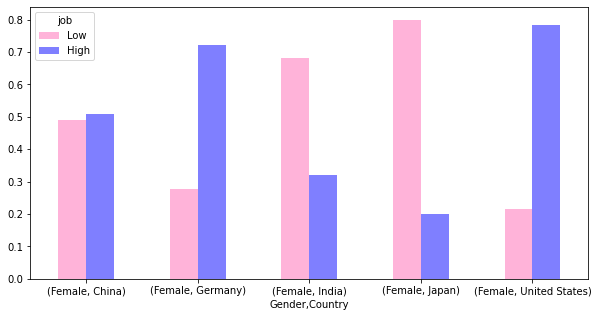

In [59]:
pdcross6.plot.bar(figsize=(10,5),rot=0, color=['hotpink','blue'], alpha = 0.5);

## <mark><font color='hotpink' size=6 face=雅黑>Q7 whether the justification of suicide can predict where the people come from.<font><mark> 
    (People)Suicide ---> Country's location (Asia or Western area)

In [60]:
df1['Justifiable_Suicide'].value_counts()

Never justifiable    4733
2                     752
5                     665
3                     602
4                     318
10                    238
6                     209
8                     164
7                     154
9                      77
Name: Justifiable_Suicide, dtype: int64

In [61]:
df1['Justifiable_Suicide'].replace('Never justifiable', '1', inplace = True)
df1['Justifiable_Suicide'] = df1['Justifiable_Suicide'].astype(int)

In [62]:
Reasonable_suicide = df1['Justifiable_Suicide']
bins = [1.0,4.0,7.0,10.0]
bin_names = ['Never justifiable', '50/50','Justifiable']

df1['Suicide'] = pd.cut(Reasonable_suicide,bins,labels=bin_names)
print(df1['Suicide'].value_counts())

Never justifiable    1672
50/50                1028
Justifiable           479
Name: Suicide, dtype: int64


In [63]:
prcross7 = pd.crosstab(df1['Country'], df1['Suicide'], normalize='index')
prcross7.sort_values(by='Justifiable', inplace = True, ascending = True)
prcross7

Suicide,Never justifiable,50/50,Justifiable
Country,,,
Japan,0.556911,0.341463,0.101626
China,0.661130,0.230897,0.107973
India,0.693478,0.173913,0.132609
United States,0.407547,0.437736,0.154717
Germany,0.475956,0.321825,0.202219


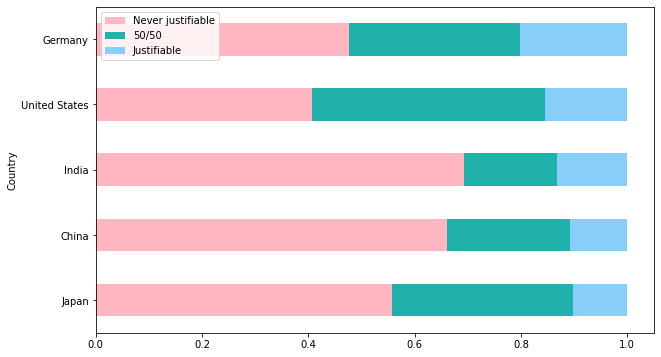

In [64]:
prcross7.plot.barh(stacked=True, figsize=(10,6), rot=0, color = ['lightpink','lightseagreen','lightskyblue']);
plt.legend(loc=2);

## <mark><font color='hotpink' size=6 face=雅黑>Question Q8 Examine whether the satifaction about financial can predict where the people come from.<font><mark> 
    (People)Satification ---> Country's location(Asia or Westerns)

In [65]:
df1.Satisfaction_with_financial.value_counts()

7                          1384
8                          1365
6                          1109
5                          1094
4                           700
9                           659
10                          588
3                           482
Completely dissatisfied     295
2                           236
Name: Satisfaction_with_financial, dtype: int64

In [66]:
df1['Satisfaction_with_financial'].replace('Completely dissatisfied', '1', inplace = True)
df1['Satisfaction_with_financial'] = df1['Satisfaction_with_financial'].astype(int)

In [67]:
Satisfaction = df1['Satisfaction_with_financial']
bins = [1.0,4.0,7.0,10.0]
bin_names = ['Low','Middle','High']

df1['Satisfaction'] = pd.cut(Satisfaction,bins,labels=bin_names)
print(df1.Satisfaction.value_counts())
df1.tail()

Middle    3587
High      2612
Low       1418
Name: Satisfaction, dtype: int64


,Country,Men_should_get_job_when_job_scarce,Wife_shouldnot_earn_more_than_husband,Job_make_women_independent,Mother_work_children_suffer,Male_political_leaders_better,UniEducation_is_more_important_for_boy,Male_business_executives_better,Housewife_fulfilling_working,Marriage_status,...,Age,Survey_year,I_WOMJOB,I_HOMOLIB,Male_should_get,Women_earn_more_is_issue,Gender,job,Suicide,Satisfaction
7907,India,1,1,1,1,1,4,3,1,Yes,...,39,2012,0.5,0.000000e+00,Agree,Agree,Male,Low,NaN,High
7908,India,2,3,1,1,3,4,2,1,Yes,...,47,2012,0.5,0.000000e+00,Neither,Disagree,Female,Low,NaN,Middle
7909,India,3,3,1,3,4,4,3,2,Yes,...,33,2012,1.0,0.000000e+00,Disagree,Disagree,Female,High,NaN,High
7910,India,1,3,1,1,3,3,3,1,Yes,...,31,2012,0.5,1.779649e-43,Agree,Disagree,Female,Low,NaN,Low
7911,India,3,3,1,2,4,3,4,4,NO,...,35,2012,1.0,0.000000e+00,Disagree,Disagree,Female,High,NaN,Middle


In [68]:
prcross8 = pd.crosstab([df1.Country],[df1.Satisfaction], normalize='index')
prcross8.sort_values(by='High', inplace = True, ascending = True)
prcross8

Satisfaction,Low,Middle,High
Country,,,
India,0.212170,0.515619,0.272211
China,0.160991,0.509288,0.329721
Japan,0.197898,0.457093,0.345009
United States,0.186107,0.414204,0.399689
Germany,0.158088,0.439706,0.402206


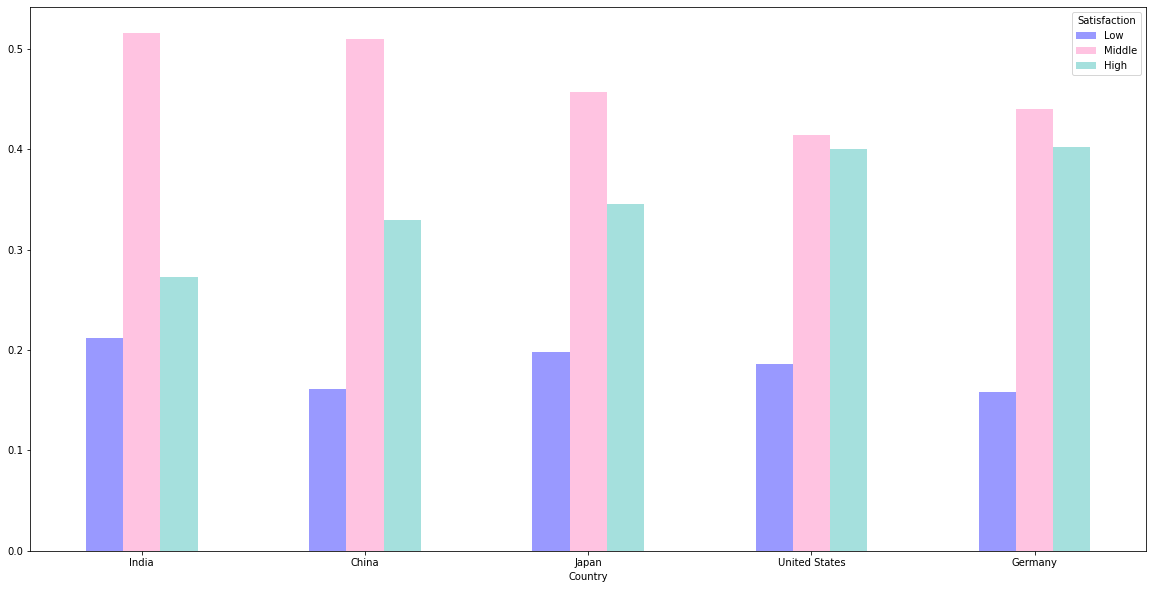

In [69]:
prcross8.plot.bar(figsize=(20,10),rot=0, color=['blue','hotpink','lightseagreen'],  alpha = 0.4);

## <mark><font color='hotpink' size=6 face=雅黑>Question Q9 Examine whether the homosexuality acceptance can predict where the people come from.<font><mark> 
    (People)homosexuality acceptance ---> Country's location(Asia or Westerns)

In [70]:
df1.I_HOMOLIB.value_counts()

0.000000e+00    3502
1.000000e+00     974
4.444440e-01     890
1.111110e-01     478
2.222220e-01     384
7.777780e-01     343
1.779649e-43     321
5.555560e-01     316
3.333330e-01     259
6.666670e-01     256
8.888890e-01     189
Name: I_HOMOLIB, dtype: int64

In [71]:
Homosexuality = df1['I_HOMOLIB']
bins = [0,0.5,1.0]
bin_names = ['Not accept','Accept']

df1['Homosexuality'] = pd.cut(Homosexuality,bins,labels=bin_names)
print(df1.Homosexuality.value_counts())
df1.tail()

Not accept    2332
Accept        2078
Name: Homosexuality, dtype: int64


,Country,Men_should_get_job_when_job_scarce,Wife_shouldnot_earn_more_than_husband,Job_make_women_independent,Mother_work_children_suffer,Male_political_leaders_better,UniEducation_is_more_important_for_boy,Male_business_executives_better,Housewife_fulfilling_working,Marriage_status,...,Survey_year,I_WOMJOB,I_HOMOLIB,Male_should_get,Women_earn_more_is_issue,Gender,job,Suicide,Satisfaction,Homosexuality
7907,India,1,1,1,1,1,4,3,1,Yes,...,2012,0.5,0.000000e+00,Agree,Agree,Male,Low,NaN,High,NaN
7908,India,2,3,1,1,3,4,2,1,Yes,...,2012,0.5,0.000000e+00,Neither,Disagree,Female,Low,NaN,Middle,NaN
7909,India,3,3,1,3,4,4,3,2,Yes,...,2012,1.0,0.000000e+00,Disagree,Disagree,Female,High,NaN,High,NaN
7910,India,1,3,1,1,3,3,3,1,Yes,...,2012,0.5,1.779649e-43,Agree,Disagree,Female,Low,NaN,Low,Not accept
7911,India,3,3,1,2,4,3,4,4,NO,...,2012,1.0,0.000000e+00,Disagree,Disagree,Female,High,NaN,Middle,NaN


In [72]:
prcross9 = pd.crosstab([df1.Country],[df1.Homosexuality], normalize='index')
prcross9.sort_values(by='Accept', inplace = True, ascending = True)
prcross9

Homosexuality,Not accept,Accept
Country,,
India,0.818713,0.181287
China,0.765996,0.234004
Japan,0.522293,0.477707
United States,0.447732,0.552268
Germany,0.358888,0.641112


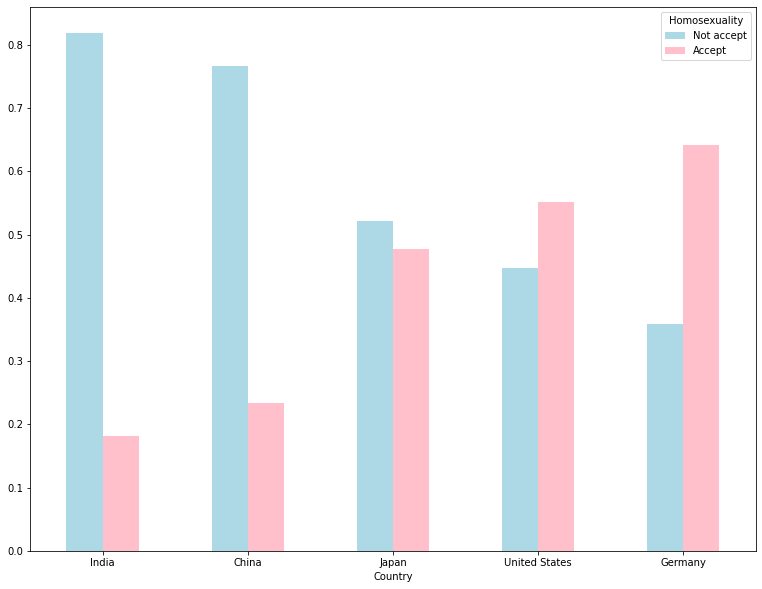

In [73]:
prcross9.plot.bar(figsize=(13,10),rot=0, color=['lightblue','pink']);

## <mark><font color='hotpink' size=6 face=雅黑>Question Q10 Examine whether perception of university education can predict where the people come from.<font><mark> 
    (People)perception of university education ---> Country's location(Asia or Westerns)

In [74]:
df1.UniEducation_is_more_important_for_boy.value_counts()

3    3711
4    2406
2    1104
1     691
Name: UniEducation_is_more_important_for_boy, dtype: int64

In [75]:
df1['UniEducation_is_more_important_for_boy'] = df1['UniEducation_is_more_important_for_boy'].astype(int)
gendereducation = df1['UniEducation_is_more_important_for_boy']
bins = [1,2.9,4.0]
bin_names = ['Agree','Disagree']

df1['UniEducation_is_more_important_for_boy'] = pd.cut(gendereducation,bins,labels=bin_names)
print(df1.UniEducation_is_more_important_for_boy.value_counts())
df1.tail()

Disagree    6117
Agree       1104
Name: UniEducation_is_more_important_for_boy, dtype: int64


,Country,Men_should_get_job_when_job_scarce,Wife_shouldnot_earn_more_than_husband,Job_make_women_independent,Mother_work_children_suffer,Male_political_leaders_better,UniEducation_is_more_important_for_boy,Male_business_executives_better,Housewife_fulfilling_working,Marriage_status,...,Survey_year,I_WOMJOB,I_HOMOLIB,Male_should_get,Women_earn_more_is_issue,Gender,job,Suicide,Satisfaction,Homosexuality
7907,India,1,1,1,1,1,Disagree,3,1,Yes,...,2012,0.5,0.000000e+00,Agree,Agree,Male,Low,NaN,High,NaN
7908,India,2,3,1,1,3,Disagree,2,1,Yes,...,2012,0.5,0.000000e+00,Neither,Disagree,Female,Low,NaN,Middle,NaN
7909,India,3,3,1,3,4,Disagree,3,2,Yes,...,2012,1.0,0.000000e+00,Disagree,Disagree,Female,High,NaN,High,NaN
7910,India,1,3,1,1,3,Disagree,3,1,Yes,...,2012,0.5,1.779649e-43,Agree,Disagree,Female,Low,NaN,Low,Not accept
7911,India,3,3,1,2,4,Disagree,4,4,NO,...,2012,1.0,0.000000e+00,Disagree,Disagree,Female,High,NaN,Middle,NaN


In [76]:
prcross10 = pd.crosstab([df1.Country],[df1.UniEducation_is_more_important_for_boy], normalize='index')
prcross10.sort_values(by='Agree', inplace = True, ascending = True)
prcross10

UniEducation_is_more_important_for_boy,Agree,Disagree
Country,,
United States,0.055972,0.944028
Germany,0.102222,0.897778
Japan,0.197509,0.802491
China,0.216586,0.783414
India,0.229429,0.770571


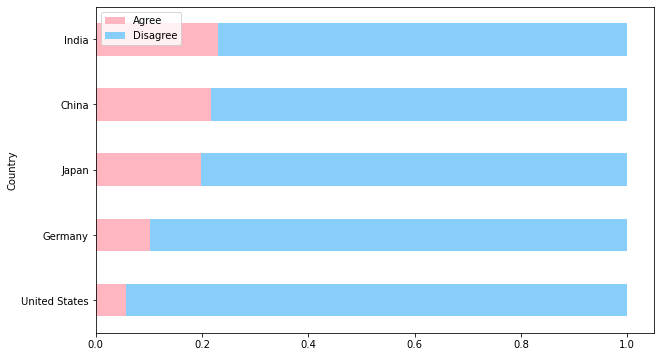

In [77]:
prcross10.plot.barh(stacked=True, figsize=(10,6), rot=0, color = ['lightpink','lightskyblue']);
plt.legend(loc=2);

## <mark><font color='hotpink' size=6 face=雅黑>Before the predicion model...<font><mark> 
    Based on the previouse analysis, I will put those variable into the prediction model to see whether those variable really have the ability to prdict a person is from Asia area or form Western area.
    Although in the previous analysis I only used the top 5 largest ecnomic, I will include more regions in the following process. 
